# Project: Plant Seedlings Classicication.
Data Description:
You are provided with a training set and a test set of images of plant seedlings at various stages of grown.
Each image has a filename that is its unique id.
The dataset comprises 12 plant species.
The goal of the competition is to create a classifier capable of determining a plant's species from a photo.
# Dataset:
Provided by the platform.

# Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages.
# Objective:
To implement the techniques learnt as a part of the course.
# Learning Outcomes:


1.   Pre-processing of image data.
2.   Visualization of images.
3.   Building CNN.
4.   Evaluate the Model.






In [3]:
from google.colab import drive
# Import necessary modules.

import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.chdir('/content/drive/My Drive/Colab Notebooks/CNN Project')

In [5]:
ls -l

total 228329
-rw------- 1 root root 233472128 Nov  4 17:17 images.npy
-rw------- 1 root root     68874 Nov  4 17:18 Labels.csv
-rw------- 1 root root    266827 Nov  5 22:06 Project_CNN_Seed_Image.ipynb


In [6]:
# Load the NPY and CSV File  since its already been downloaded by the Olympus Platform
trainImg = np.load('images.npy')  # Train images set


In [7]:
trainImg.shape

(4750, 128, 128, 3)

In [8]:
trainLabel = pd.read_csv('Labels.csv')  # Train labels set

In [9]:
trainLabel.shape

(4750, 1)

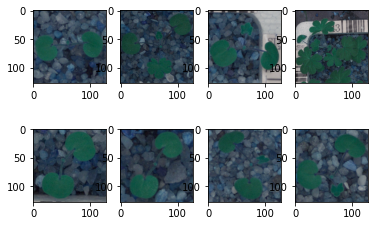

In [10]:
# See some example images
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(trainImg[i])

# Apply image processing :
Gaussian Blurring.


Normalization.

Visualize data after pre-processing.

In [11]:
preprocessed_train = []       # Initialize empty list to store the images  pre-processing.

for img in trainImg:
    # Gaussian blur  
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    # Append image
    preprocessed_train.append(blurImg)         
# Convert to numpy array.   
preprocessed_train = np.asarray(preprocessed_train)    

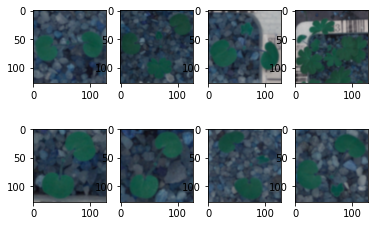

In [12]:
# Show some sample images post blurring
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(preprocessed_train[i])

In [13]:

# Normalize image data.
preprocessed_train = preprocessed_train / 255

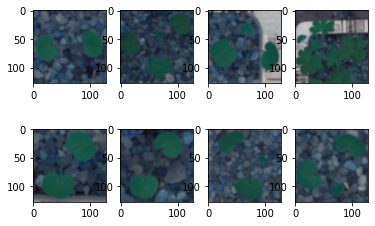

In [14]:
# visualize data after pre-processing
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(preprocessed_train[i])


# Reshape data into shapes compatible with Keras models.
# Convert labels from digits to one hot vectors.
# Print the label for y_train[0].

In [15]:

# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(trainLabel)

In [16]:
# print y train
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [17]:
# first split into test size 0.3 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_train, y, test_size=0.3, random_state=42)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [19]:
# Reshape  into shapes compatible with Keras models.

X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

In [20]:
# Split furthur into tes_size=0.5
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

In [21]:
print(X_test.shape)
print(X_val.shape)

(712, 128, 128, 3)
(713, 128, 128, 3)


# Building CNN:
Define layers.
Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy)

In [22]:
# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size, 128, 128, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [24]:
#  Adam optimizer 

optimizer = Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
# Set epochs = 40, and fit the model.
model.fit(X_train, y_train, epochs = 40, validation_data = (X_val,Y_val),batch_size = batch_size)

Epoch 1/40
104/104 [==============================] - 6s 59ms/step - loss: 2.2592 - accuracy: 0.2189 - val_loss: 2.2475 - val_accuracy: 0.2440
Epoch 2/40
104/104 [==============================] - 5s 50ms/step - loss: 1.9789 - accuracy: 0.2938 - val_loss: 1.9637 - val_accuracy: 0.2819
Epoch 3/40
104/104 [==============================] - 5s 51ms/step - loss: 1.8673 - accuracy: 0.3332 - val_loss: 1.9059 - val_accuracy: 0.3773
Epoch 4/40
104/104 [==============================] - 5s 51ms/step - loss: 1.7559 - accuracy: 0.3645 - val_loss: 1.7993 - val_accuracy: 0.3464
Epoch 5/40
104/104 [==============================] - 5s 51ms/step - loss: 1.6865 - accuracy: 0.3859 - val_loss: 1.8510 - val_accuracy: 0.3703
Epoch 6/40
104/104 [==============================] - 5s 51ms/step - loss: 1.5736 - accuracy: 0.4376 - val_loss: 1.5245 - val_accuracy: 0.4881
Epoch 7/40
104/104 [==============================] - 5s 52ms/step - loss: 1.4089 - accuracy: 0.5128 - val_loss: 1.3832 - val_accuracy: 0.5568

In [35]:
# Evaluate the model.

score = model.evaluate(X_test, y_test, verbose=0, batch_size = 50)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.42039793729782104
Test accuracy: 0.858146071434021


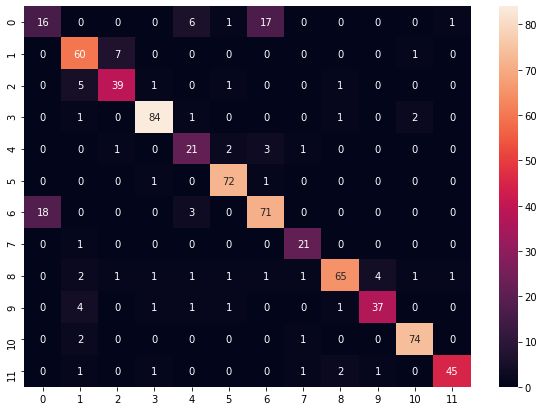

In [36]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

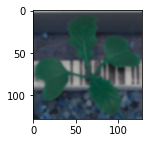

Predicted Label 1
True Label 1


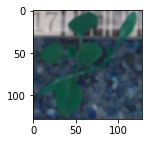

Predicted Label 3
True Label 3


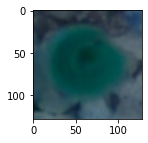

Predicted Label 7
True Label 7


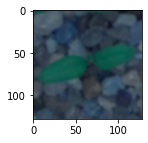

Predicted Label 3
True Label 3


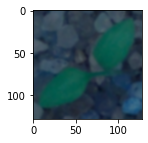

Predicted Label 3
True Label 3


In [37]:
# Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[3],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[3].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[2],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[2].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[33],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[33].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[33]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[59].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[59]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[36],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[36].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[36]))

Using the existing parameters i was able to get to test accuracy of Test accuracy: 0.8103932738304138 .